<div style="text-align:center;vertical-align:middle;background-color:#34495E;display:inline-block;border:5px;border-style:round;border-color:#0000ff;border-radius:25px;width:960px;height:60px">
    <h1 style="text-align:center;color:lightgray;font-size:200%;">Titanic - Machine Learning from Disaster</h1>
</div>

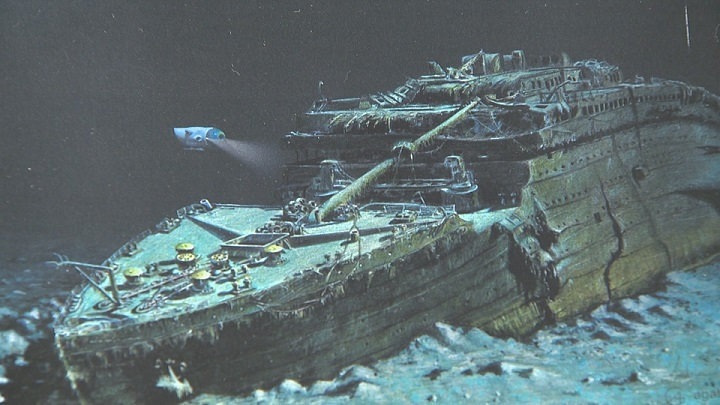

The RMS Titanic, a luxury steamship, sank in the early hours of April 15, 1912, off the coast of Newfoundland in the North Atlantic after sideswiping an iceberg during its maiden voyage. Of the 2,240 passengers and crew on board, more than 1,500 lost their lives in the disaster.

<table align="left">
<tr style="background-color:seagreen;color:white;">
<td></td>
<td>Prediction of Survival on The Titanic</td>
<td></td>
</tr>
</table>

### CONTENT
<a id='content'></a>


- 1) [Exploratory Data Analysis](#phase1)
    * 1.1 [Data Review](#eda1)
    * 1.2 [Correlations](#eda2)
    * 1.3 [Outliers](#eda3)
    * 1.4 [Review of Features and Filling Missing Values](#eda4)


- 2) [Data pre-processing](#phase2)
    * 2.1 [Transformers for Encoders](#pre1)
    * 2.2 [Train-Test Split](#pre2)
    
    
- 3) [Model Building](#phase3)
    * 3.1 [GradientBoostingClassifier](#model1)
    * 3.2 [KNeighborsClassifier](#model2)
    * 3.3 [RandomForestClassifier](#model3)
    * 3.4 [XGBoostClassifier](#model4)
    
    
- 4) [Comparison of Models](#phase4)

      
- 5) [Prediction](#conc)

<div style="margin:auto;padding:10px;background-color:rosybrown;display:inline-block;border:5px;border-style:round;border-color:#0000ff;border-radius:25px;width:960px;height:60px">
    <h1 style="text-align:center;color:k;font-size:150%;">1. Exploratory Data Analysis<a id='phase1'></h1>
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
import math
import warnings
warnings.filterwarnings('ignore')

# Libraries for Style
from colorama import Fore, Style
from yellowbrick.style import set_palette
set_palette('flatui')

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.3f}'.format)

## 1.1 Data Review
<a id='eda1'>

***train data***

In [2]:
train_data = pd.read_csv('train.csv')
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_data.shape, train_data.size

((891, 12), 10692)

In [5]:
train_data.isnull().sum()[train_data.isnull().sum()>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

In [6]:
train_data.duplicated().sum()

0

In [7]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [8]:
train_data[train_data.Survived==0].iloc[:,2:].describe().style.background_gradient(cmap='twilight_r')

,Pclass,Age,SibSp,Parch,Fare
count,549.000000,424.000000,549.000000,549.000000,549.000000
mean,2.531876,30.626179,0.553734,0.329690,22.117887
std,0.735805,14.172110,1.288399,0.823166,31.388207
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.854200
50%,3.000000,28.000000,0.000000,0.000000,10.500000
75%,3.000000,39.000000,1.000000,0.000000,26.000000
max,3.000000,74.000000,8.000000,6.000000,263.000000


In [9]:
train_data[train_data.Survived==1].iloc[:,2:].describe().style.background_gradient(cmap='twilight_r')

,Pclass,Age,SibSp,Parch,Fare
count,342.000000,290.000000,342.000000,342.000000,342.000000
mean,1.950292,28.343690,0.473684,0.464912,48.395408
std,0.863321,14.950952,0.708688,0.771712,66.596998
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,19.000000,0.000000,0.000000,12.475000
50%,2.000000,28.000000,0.000000,0.000000,26.000000
75%,3.000000,36.000000,1.000000,1.000000,57.000000
max,3.000000,80.000000,4.000000,5.000000,512.329200


***test data***

In [10]:
test_data = pd.read_csv('test.csv')
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.500,0,0,330911,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,363272,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.000,0,0,240276,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.000,0,0,315154,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.000,1,1,3101298,12.287,NaN,S


In [11]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [12]:
test_data.shape, test_data.size

((418, 11), 4598)

In [13]:
test_data.isnull().sum()[test_data.isnull().sum()>0]
# there are missing values on the test data

Age       86
Fare       1
Cabin    327
dtype: int64

***temporary dataframe for analysis***

In [14]:
df_temp = train_data.append(test_data, ignore_index=True)
df_temp['FamilySize'] = df_temp['SibSp'] + df_temp['Parch']
df_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.000,3,"Braund, Mr. Owen Harris",male,22.000,1,0,A/5 21171,7.250,NaN,S,1
1,2,1.000,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000,1,0,PC 17599,71.283,C85,C,1
2,3,1.000,3,"Heikkinen, Miss. Laina",female,26.000,0,0,STON/O2. 3101282,7.925,NaN,S,0
3,4,1.000,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000,1,0,113803,53.100,C123,S,1
4,5,0.000,3,"Allen, Mr. William Henry",male,35.000,0,0,373450,8.050,NaN,S,0


## 1.2 Correlations
<a id='eda2'>

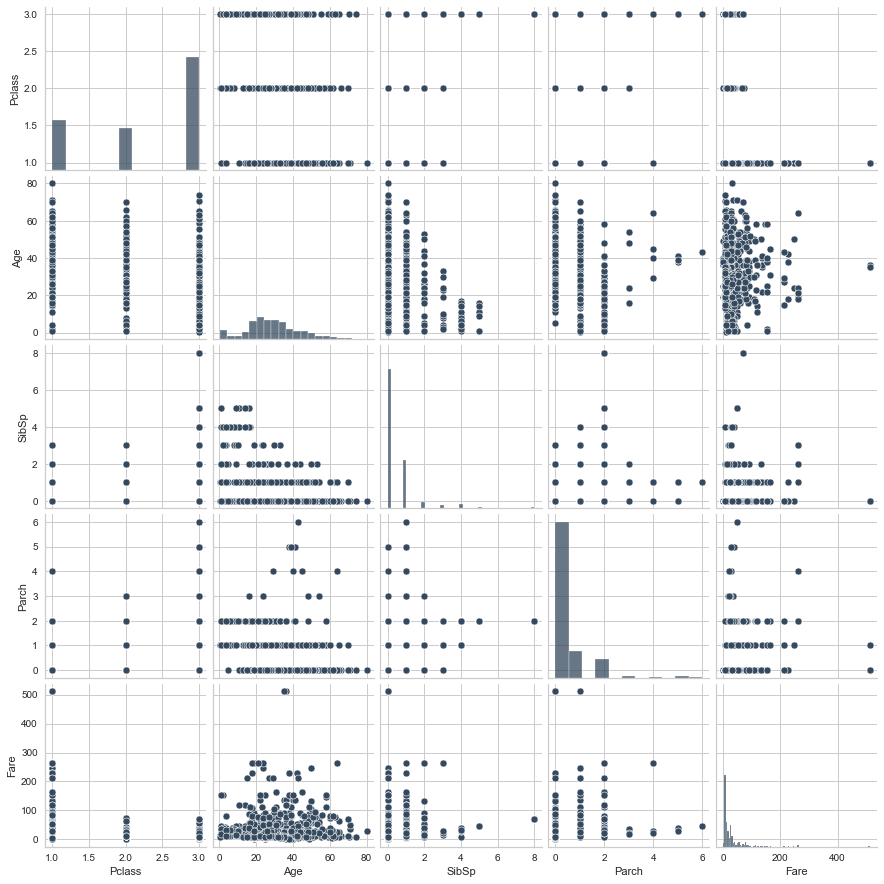

In [15]:
sns.pairplot(train_data.iloc[:, 2:])

<AxesSubplot:>

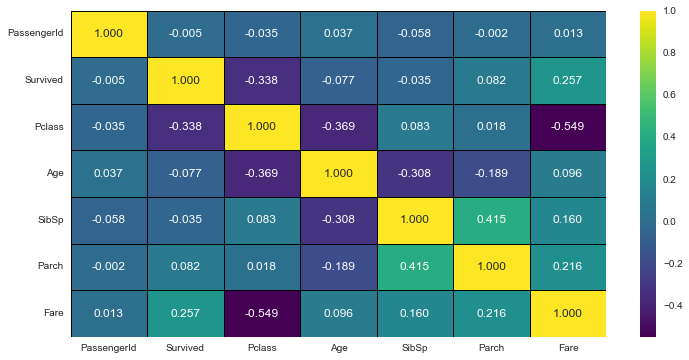

In [16]:
plt.figure(figsize=(12, 6))
sns.heatmap(train_data.corr(), annot=True, cmap='viridis', linewidth=1, linecolor='black', fmt='.3f')

<AxesSubplot:>

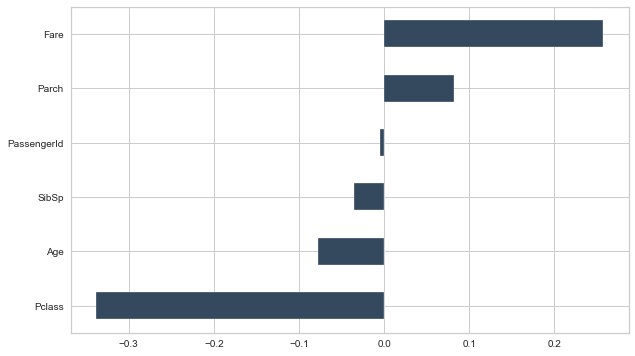

In [17]:
train_data.corr()['Survived'].drop('Survived').sort_values().plot.barh()

## 1.3 Outliers
<a id='eda3'>

In [18]:
# OUTLIERS

iqr_factor = [1.5, 2]
list1, list2 = [], []

for factor in iqr_factor:
    count = 0
    print(f'Outliers for {factor} IQR :')
    print('-------------------------------------')
    for col in train_data.select_dtypes(['int64', 'float64']):
    
        IQR = train_data[col].quantile(0.75) - train_data[col].quantile(0.25)
        lower_lim = train_data[col].quantile(0.25) - factor*IQR
        upper_lim = train_data[col].quantile(0.75) + factor*IQR
    
        cond = train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].shape[0]
        
        if cond > 0 and factor == 1.5:
            list1.append(train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].index.tolist())
        elif cond > 0 and factor == 2:
            list2.append(train_data[(train_data[col] < lower_lim) | (train_data[col] > upper_lim)].index.tolist())
        
        if cond > 0: print(f'{col:<30} : ', cond); count += cond
    print(f'\n{Fore.BLUE}TOTAL OUTLIERS FOR {factor} IQR : {count}{Style.RESET_ALL}')
    print('')

Outliers for 1.5 IQR :
-------------------------------------
Age                            :  11
SibSp                          :  46
Parch                          :  213
Fare                           :  116

TOTAL OUTLIERS FOR 1.5 IQR : 386

Outliers for 2 IQR :
-------------------------------------
Age                            :  2
SibSp                          :  30
Parch                          :  213
Fare                           :  92

TOTAL OUTLIERS FOR 2 IQR : 337



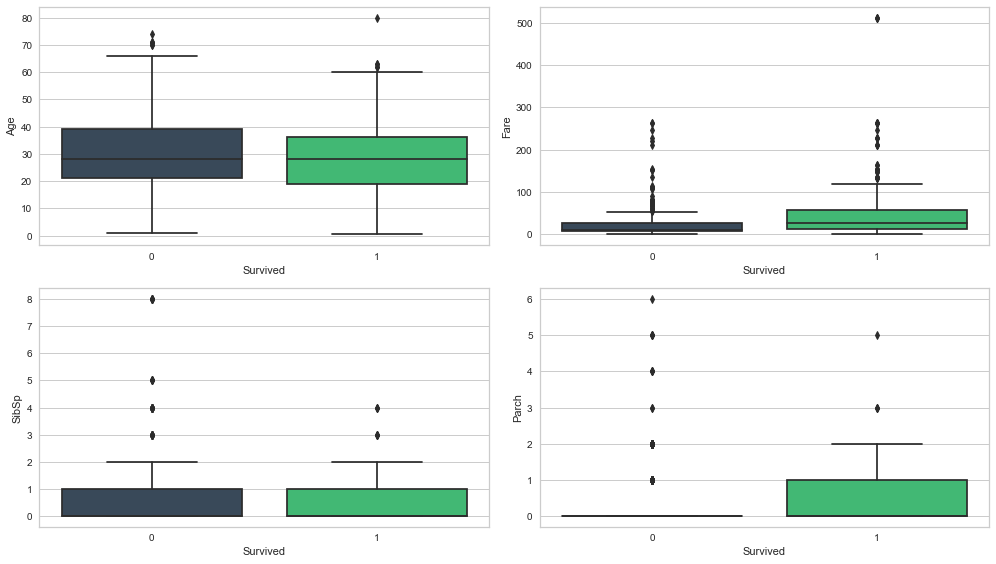

In [19]:
fig, ax = plt.subplots(2,2, figsize=(14,8))
sns.boxplot(data=train_data, x='Survived', y='Age', ax=ax[0,0])
sns.boxplot(data=train_data, x='Survived', y='Fare', ax=ax[0,1])
sns.boxplot(data=train_data, x='Survived', y='SibSp', ax=ax[1,0])
sns.boxplot(data=train_data, x='Survived', y='Parch', ax=ax[1,1])

plt.tight_layout();

## 1.4 Review of Features and Filling Missing Values
<a id='eda4'>

[CONTENT](#content)

In [20]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

***Pclass***

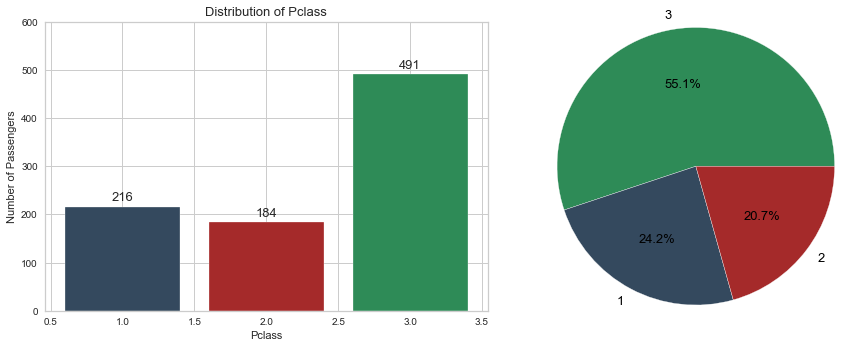

In [21]:
plt.figure(figsize=(13,5))

x = train_data['Pclass'].value_counts().index
y = train_data['Pclass'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Pclass', color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 600)

plt.xlabel('Pclass'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Pclass', size=13)
   
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();

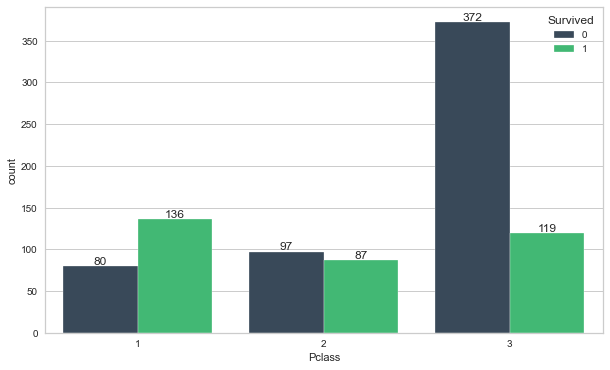

In [22]:
g = sns.countplot(data=train_data, x='Pclass', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

***sex***

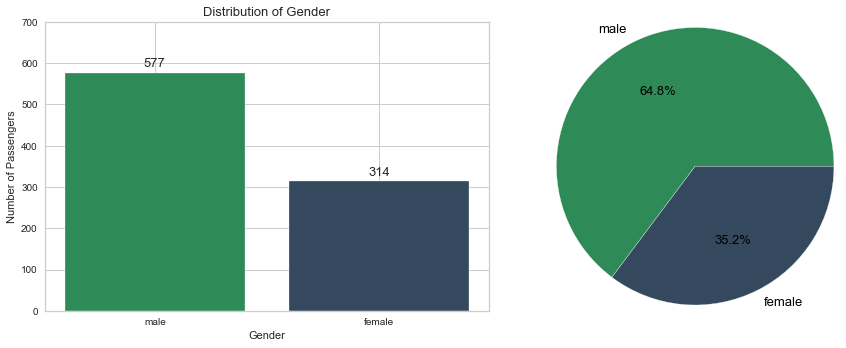

In [23]:
plt.figure(figsize=(13,5))

x = train_data['Sex'].value_counts().index
y = train_data['Sex'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Sex', color=['seagreen','#34495E'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 700)

plt.xlabel('Gender'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Gender', size=13)
    
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E'])

plt.tight_layout();

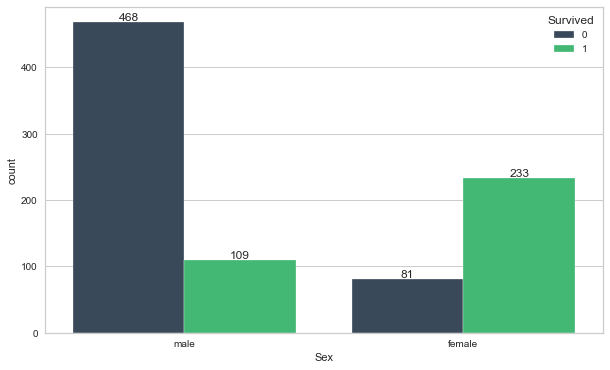

In [24]:
g = sns.countplot(data=train_data, x='Sex', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

***SibSp - Parch*** 

SibSp: Number of siblings and spouses of the passenger aboard

Parch: Number of parents and children of the passenger aboard

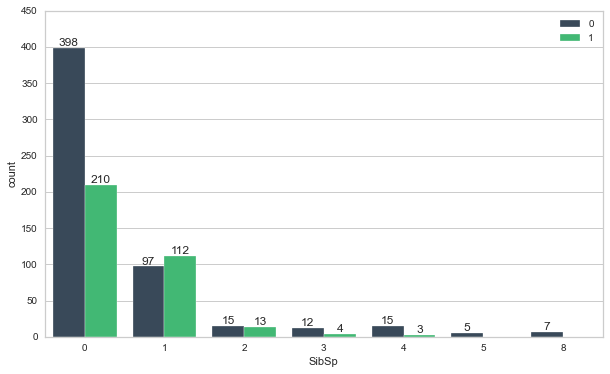

In [35]:
g = sns.countplot(data=train_data, x='SibSp', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1])
g.set_ylim(0,450), plt.legend(loc='upper right');

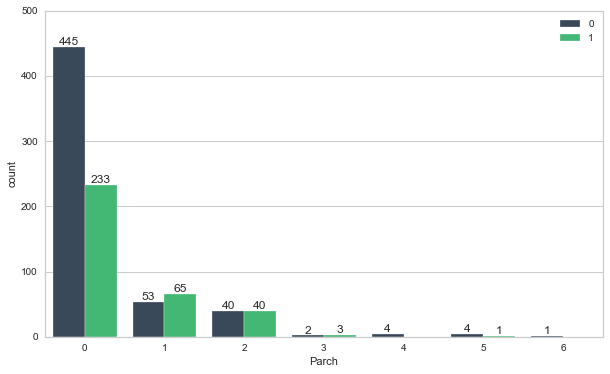

In [36]:
g = sns.countplot(data=train_data, x='Parch', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1])
g.set_ylim(0,500), plt.legend(loc='upper right');

***Age***

<AxesSubplot:xlabel='Age', ylabel='Count'>

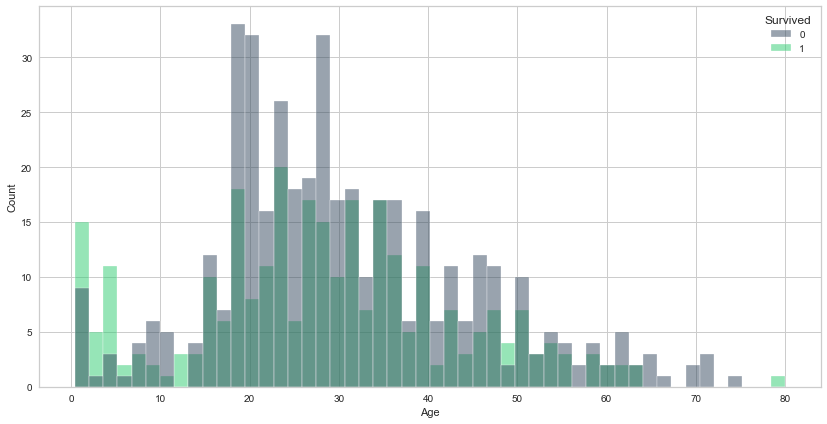

In [26]:
plt.figure(figsize=(14,7))
sns.histplot(data=train_data, x='Age', hue='Survived', bins=50)

In [25]:
train_data.Age.isnull().sum(), test_data.Age.isnull().sum()

(177, 86)

In [27]:
train_data[train_data.Age.isnull()][['SibSp', 'Parch']].describe().T

,count,mean,std,min,25%,50%,75%,max
SibSp,177.000,0.565,1.626,0.000,0.000,0.000,0.000,8.000
Parch,177.000,0.181,0.534,0.000,0.000,0.000,0.000,2.000


In [28]:
# combined dataframe
df_temp[df_temp.Age.isna()].groupby(['SibSp', 'Parch']).Age.value_counts(dropna=False)

SibSp  Parch  Age
0      0      NaN    200
       1      NaN      1
       2      NaN      4
       4      NaN      1
1      0      NaN     28
       1      NaN      5
       2      NaN      4
       9      NaN      2
2      0      NaN      6
3      1      NaN      4
8      2      NaN      8
Name: Age, dtype: int64

In [29]:
df_temp.groupby(['SibSp','Parch','Pclass']).Age.mean()

SibSp  Parch  Pclass
0      0      1        40.488
              2        32.218
              3        27.608
       1      1        36.769
              2        27.900
              3        18.283
       2      1        27.455
              2        21.025
              3        22.389
       3      2        36.000
              3        24.000
       4      3        29.000
       5      3        40.000
1      0      1        38.732
              2        32.655
              3        26.452
       1      1        48.217
              2        21.500
              3        16.750
       2      1        20.213
              2        22.577
              3        15.043
       3      1        54.500
              2        54.000
              3        32.000
       4      1        62.000
              3        42.500
       5      3        39.000
       6      3        41.500
       9      3           NaN
2      0      1        52.200
              2        24.600
              3    

In [30]:
df_temp.Age.fillna(df_temp.groupby(['SibSp','Parch','Pclass']).Age.transform('mean'), inplace=True)
df_temp.Age.fillna(df_temp[(df_temp.SibSp==1) & (df_temp.Parch>=6)].Age.mean(), inplace=True)

In [31]:
df_temp.Age = df_temp.Age.apply(math.ceil)

In [32]:
train_data.Age = df_temp.iloc[:891]['Age'].values
test_data.Age = df_temp.iloc[891:]['Age'].values

In [33]:
train_data.Age.isnull().sum(), test_data.Age.isnull().sum()

(0, 0)

In [34]:
test_data.Age.unique()

array([35, 47, 62, 27, 22, 14, 30, 26, 18, 21, 28, 46, 23, 63, 24, 45, 55,
        9, 41, 48, 50, 25, 33, 16, 19, 39, 60, 36, 20, 10, 17, 32, 13, 31,
       29,  6, 67, 49,  2, 76, 43,  1, 12, 42, 53, 40, 61,  7, 15, 54, 64,
       37, 34,  8, 38, 57, 58, 59, 44,  5, 51,  3], dtype=int64)

***Embarked*** 
    
Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

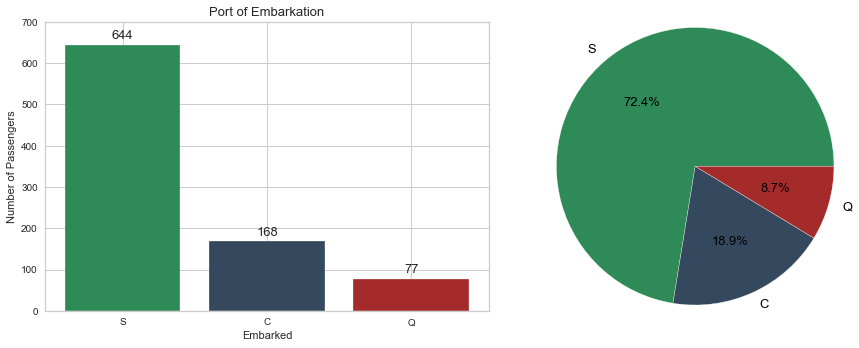

In [37]:
plt.figure(figsize=(13,5))

x = train_data['Embarked'].value_counts().index
y = train_data['Embarked'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Embarked',color=['seagreen','#34495E', 'brown'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 700)

plt.xlabel('Embarked'), plt.ylabel('Number of Passengers') 
plt.title('Port of Embarkation', size=13)
    
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E', 'brown'])

plt.tight_layout();

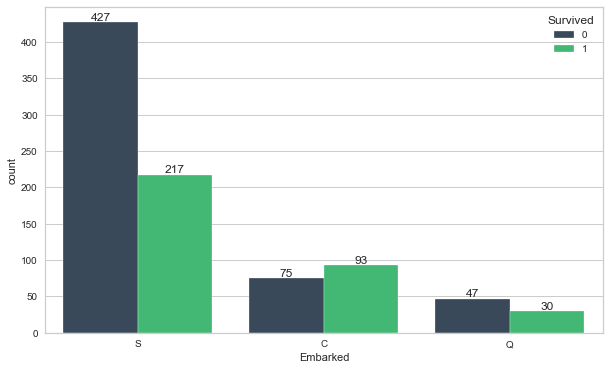

In [38]:
g = sns.countplot(data=train_data, x='Embarked', hue='Survived')
g.bar_label(g.containers[0]), g.bar_label(g.containers[1]);

In [39]:
train_data[train_data.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38,0,0,113572,80.000,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62,0,0,113572,80.000,B28,NaN


In [40]:
df_temp.groupby(['Embarked', df_temp.Pclass.astype(str)]).Fare.describe().style.background_gradient()

In [42]:
train_data.Embarked.fillna('S', inplace=True)

***Fare***

<AxesSubplot:xlabel='Fare', ylabel='Count'>

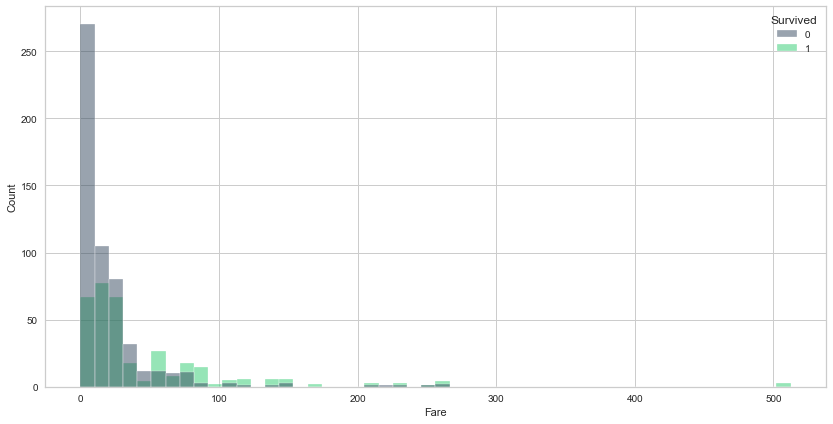

In [43]:
plt.figure(figsize=(14,7))
sns.histplot(data=train_data, x='Fare', hue='Survived', bins=50)

In [44]:
train_data.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.000,22.118,31.388,0.000,7.854,10.500,26.000,263.000
1,342.000,48.395,66.597,0.000,12.475,26.000,57.000,512.329


In [45]:
test_data[test_data.Fare.isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,61,0,0,3701,NaN,NaN,S


In [46]:
df_temp[df_temp.Ticket=='3701']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
1043,1044,NaN,3,"Storey, Mr. Thomas",male,61,0,0,3701,NaN,NaN,S,0


In [47]:
fare_value = df_temp[(df_temp.Pclass==3) & (df_temp.Embarked=='S') & (df_temp.FamilySize==0)].Fare
fare_value.describe()
# fare values have outliers so median might be a viable option

count   323.000
mean      9.594
std       8.019
min       0.000
25%       7.775
50%       7.896
75%       8.050
max      56.496
Name: Fare, dtype: float64

In [48]:
test_data.Fare.fillna(fare_value.median(), inplace=True)

***Ticket***

In [49]:
df_temp.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

In [50]:
nonunique_tickets = df_temp.Ticket.value_counts()[df_temp.Ticket.value_counts().values>1]
nonunique_tickets.index

Index(['CA. 2343', 'CA 2144', '1601', 'PC 17608', 'S.O.C. 14879', '347077',
       '347082', '3101295', '19950', '113781',
       ...
       '2680', '36973', 'STON/O2. 3101279', '376564', '237789', 'SC/AH 3085',
       '2689', '11765', '113776', 'CA 31352'],
      dtype='object', length=216)

In [51]:
unique_tickets = df_temp.Ticket.value_counts()[df_temp.Ticket.value_counts().values==1]
unique_tickets.index

Index(['370374', '349217', 'SOTON/O.Q. 3101263', '112053', '349257',
       'STON/O 2. 3101291', '113028', '7552', 'C.A./SOTON 34068', '237249',
       ...
       '364506', '111320', '234360', 'A/S 2816', 'SOTON/O.Q. 3101306',
       '113792', '36209', '323592', '315089', '359309'],
      dtype='object', length=713)

In [52]:
df_temp[(df_temp.FamilySize==0) & (df_temp.Ticket.isin(nonunique_tickets.index))].Ticket.unique()

array(['17463', '239865', '113572', 'S.O.C. 14879', '1601', '364516',
       '113059', '110465', '2627', '7534', 'PC 17593', 'C.A. 33595',
       'LINE', 'PC 17569', '2699', 'F.C.C. 13528', '11813', 'PC 17585',
       '110152', 'PC 17755', 'PC 17760', '113798', '239853', '19877',
       '17421', 'PC 17485', '11767', '16966', 'PC 17477', 'PC 17757',
       '28403', '250655', 'C.A. 6212', 'C 4001', '371110', '12749',
       'PC 17483', 'PC 17761', '364498', '244358', '358585', '248727',
       '113796', 'PC 17582', '54636', '13502', 'PC 17572', '113781',
       '250647', '36568', '24160', 'S.O./P.P. 3', 'A/4 48871', '112058',
       'PC 17608', 'F.C.C. 13534', '113503', '13050', 'C.A. 33112',
       '220845', 'C.A. 31029', 'CA 31352', '3101295', '36928', 'PC 17758'],
      dtype=object)

In [53]:
df_temp[df_temp.Ticket=='PC 17755'] # possibly acquaintances/friends

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
258,259,1.000,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.329,NaN,C,0
679,680,1.000,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.329,B51 B53 B55,C,1
737,738,1.000,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.329,B101,C,0
1234,1235,NaN,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58,0,1,PC 17755,512.329,B51 B53 B55,C,1


In [54]:
df_temp[df_temp.Ticket=='C 4001'] # possibly acquaintances/friends

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
508,509,0.000,3,"Olsen, Mr. Henry Margido",male,28,0,0,C 4001,22.525,NaN,S,0
996,997,NaN,3,"Holthen, Mr. Johan Martin",male,28,0,0,C 4001,22.525,NaN,S,0
1101,1102,NaN,3,"Andersen, Mr. Albert Karvin",male,32,0,0,C 4001,22.525,NaN,S,0


In [55]:
df_temp[(df_temp.FamilySize>0) & (df_temp.Ticket.isin(unique_tickets.index))].Ticket.unique()

array(['A/5 21171', '7546', '3101281', '315151', '3101276', '4136',
       '11752', '350404', '350046', '4579', '367229', '347083',
       'PC 17596', '2695', '3101267', '3101277', '4137', '250652',
       '347076', '65303', '3460', '65304', '29104', '2690', '13568',
       '11755', '364848', 'STON/O 2. 3101285', '350025', '350048',
       'STON/O2. 3101271', '28134', 'SC/PARIS 2149', '363272',
       'STON/O2. 3101270', 'C 17368', '11770', '367227', '2621',
       'A/4 48873', '347091', 'SC/PARIS 2148', '3101266', '250650',
       '112901', '2675', '28133', '315152', '17765', '28666'],
      dtype=object)

In [56]:
df_temp[df_temp.Ticket=='A/5 21171'] # possibly, family in different cabins/crew family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0.000,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.250,NaN,S,1


In [57]:
df_temp[df_temp.Ticket=='13568'] # possibly, family in different cabins/crew family

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
539,540,1.000,1,"Frolicher, Miss. Hedwig Margaritha",female,22,0,2,13568,49.500,B39,C,2


In [58]:
df_temp[df_temp.Name.str.contains('Frolicher')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
539,540,1.000,1,"Frolicher, Miss. Hedwig Margaritha",female,22,0,2,13568,49.500,B39,C,2
587,588,1.000,1,"Frolicher-Stehli, Mr. Maxmillian",male,60,1,1,13567,79.200,B41,C,2
1288,1289,NaN,1,"Frolicher-Stehli, Mrs. Maxmillian (Margaretha ...",female,48,1,1,13567,79.200,B41,C,2


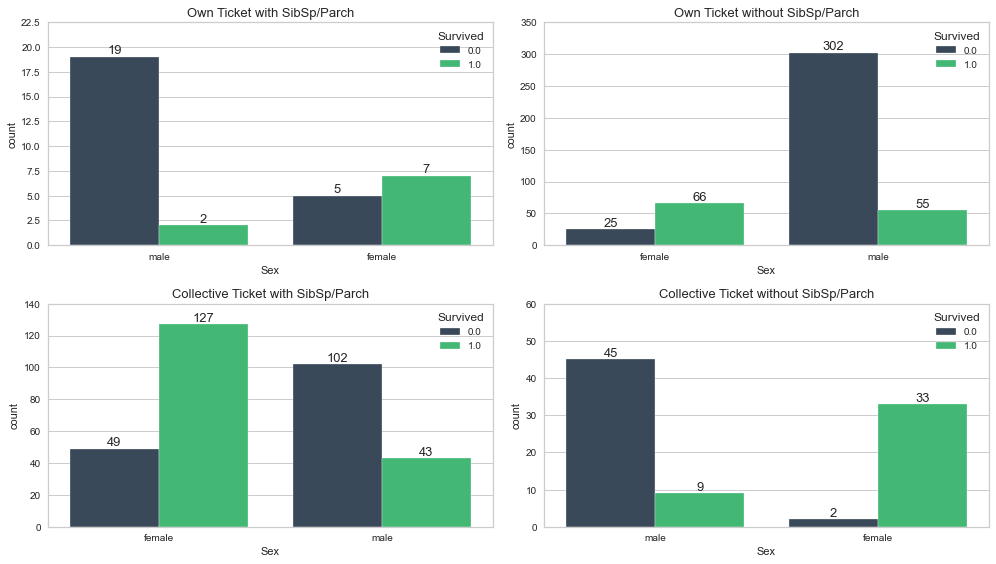

In [59]:
fig, ax = plt.subplots(2,2, figsize=(14,8))

sns.countplot(data=df_temp[(df_temp.FamilySize>0) & (df_temp.Ticket.isin(unique_tickets.index))], x='Sex', 
              hue='Survived', ax=ax[0,0]) 
ax[0,0].bar_label(ax[0,0].containers[0], size=13), ax[0,0].bar_label(ax[0,0].containers[1], size=13)

sns.countplot(data=df_temp[(df_temp.FamilySize==0) & (df_temp.Ticket.isin(unique_tickets.index))], x='Sex', 
        hue='Survived', ax=ax[0,1]) 
ax[0,1].bar_label(ax[0,1].containers[0],size=13), ax[0,1].bar_label(ax[0,1].containers[1],size=13)

sns.countplot(data=df_temp[(df_temp.FamilySize>0) & (df_temp.Ticket.isin(nonunique_tickets.index))], x='Sex', 
              hue='Survived', ax=ax[1,0])
ax[1,0].bar_label(ax[1,0].containers[0], size=13), ax[1,0].bar_label(ax[1,0].containers[1], size=13)

sns.countplot(data=df_temp[(df_temp.FamilySize==0) & (df_temp.Ticket.isin(nonunique_tickets.index))], x='Sex', 
              hue='Survived', ax=ax[1,1])
ax[1,1].bar_label(ax[1,1].containers[0], size=13), ax[1,1].bar_label(ax[1,1].containers[1], size=13)

ax[0,0].set_ylim(0, 22.5), ax[0,1].set_ylim(0, 350), ax[1,0].set_ylim(0, 140), ax[1,1].set_ylim(0, 60)

ax[0,0].set_title('Own Ticket with SibSp/Parch', size=13), 
ax[0,1].set_title('Own Ticket without SibSp/Parch', size=13)
ax[1,0].set_title('Collective Ticket with SibSp/Parch', size=13), 
ax[1,1].set_title('Collective Ticket without SibSp/Parch', size=13)

plt.tight_layout();

In [60]:
train_data.Ticket = train_data.Ticket.apply(lambda x: 'own' if x in unique_tickets else 'collective')
test_data.Ticket = test_data.Ticket.apply(lambda x: 'own' if x in unique_tickets else 'collective')

In [61]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,own,7.250,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,collective,71.283,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,own,7.925,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,collective,53.100,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,own,8.050,NaN,S


In [62]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,35,0,0,own,7.829,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,own,7.000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,own,9.688,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27,0,0,own,8.662,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,collective,12.287,NaN,S


***survived***

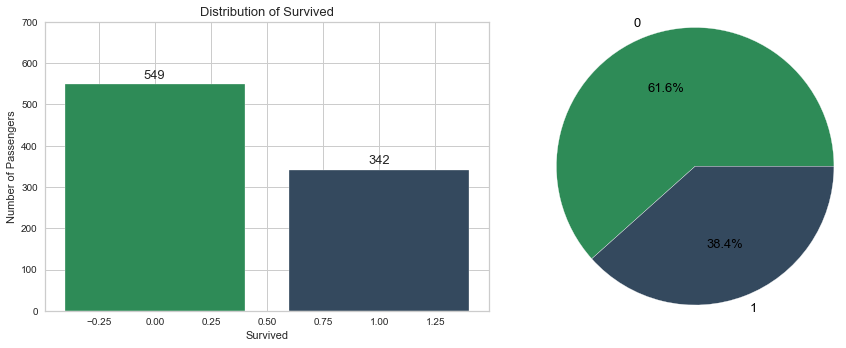

In [63]:
plt.figure(figsize=(13,5))

x = train_data['Survived'].value_counts().index
y = train_data['Survived'].value_counts().values

plt.subplot(121)
g = plt.bar(x,y,label='Survived',color=['seagreen','#34495E'])
plt.bar_label(g, padding=3, size=13), plt.ylim(0, 700)

plt.xlabel('Survived'), plt.ylabel('Number of Passengers') 
plt.title('Distribution of Survived', size=13)
    
plt.subplot(122)
plt.pie(y, labels=x, autopct='%0.1f%%', radius=1.2, textprops={'color':'black','fontsize': 13}, 
        colors=['seagreen','#34495E'])

plt.tight_layout();

***

<AxesSubplot:>

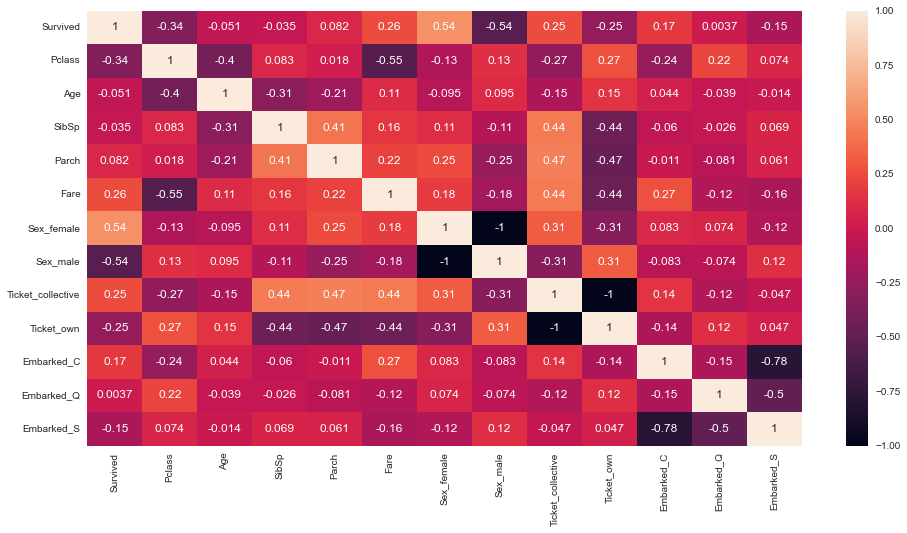

In [64]:
plt.figure(figsize=(16,8))
sns.heatmap(pd.get_dummies(train_data.drop(['PassengerId','Name','Cabin'], 1)).corr(), annot=True)

<AxesSubplot:>

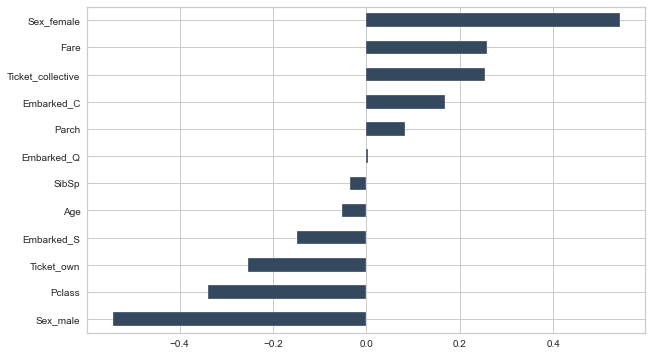

In [65]:
pd.get_dummies(train_data.drop(['PassengerId','Name','Cabin'], 1)).corr()['Survived'] \
                                            .drop('Survived').sort_values().plot.barh()

<div style="margin:auto;padding:10px;background-color:rosybrown;display:inline-block;border:5px;border-style:round;border-color:#0000ff;border-radius:25px;width:960px;height:60px">
    <h1 style="text-align:center;color:k;font-size:150%;">2. Data Pre-Processing<a id='phase2'></h1>
</div>

[CONTENT](#content)

In [66]:
train_data.drop(['PassengerId','Name','Cabin'], 1, inplace=True)
test_data.drop(['PassengerId','Name','Cabin'], 1, inplace=True)

In [67]:
print(train_data.isnull().sum().sum())
train_data.head(3)

0


,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22,1,0,own,7.250,S
1,1,1,female,38,1,0,collective,71.283,C
2,1,3,female,26,0,0,own,7.925,S


In [68]:
print(test_data.isnull().sum().sum())
test_data.head(3)

0


,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,35,0,0,own,7.829,Q
1,3,female,47,1,0,own,7.000,S
2,2,male,62,0,0,own,9.688,Q


## 2.1 Transformers for Encoders
<a id='pre1'>

In [69]:
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

In [70]:
{column: list(train_data[column].unique()) for column in train_data.select_dtypes('O').columns}

{'Sex': ['male', 'female'],
 'Ticket': ['own', 'collective'],
 'Embarked': ['S', 'C', 'Q']}

In [71]:
preprocessor = ColumnTransformer(transformers=[
    ('enc', OneHotEncoder(drop='if_binary'), ['Sex','Embarked','Ticket'])
], remainder='passthrough')

In some cases, OrdinalEncoder can be used instead of OneHotEncoder even for nominal (unordered) features when using tree-based ML algorithms.

## 2.2 Train-Test Split
<a id='pre2'>

In [72]:
X = train_data.drop('Survived', axis=1)
y = train_data['Survived']

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=15)

In [74]:
print("Train features shape : ", X_train.shape)
print("Test features shape  : ", X_test.shape)

Train features shape :  (712, 8)
Test features shape  :  (179, 8)


In [75]:
y_train.value_counts(), y_test.value_counts()

(0    439
 1    273
 Name: Survived, dtype: int64,
 0    110
 1     69
 Name: Survived, dtype: int64)

<div style="margin:auto;padding:10px;background-color:rosybrown;display:inline-block;border:5px;border-style:round;border-color:#0000ff;border-radius:25px;width:960px;height:60px">
    <h1 style="text-align:center;color:k;font-size:150%;">3. Model Building<a id='phase3'></h1>
</div>

[CONTENT](#content)

In [76]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.model_selection import cross_val_score,cross_validate,GridSearchCV

from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.metrics import accuracy_score, f1_score,recall_score,precision_score
from sklearn.metrics import average_precision_score,precision_recall_curve,plot_precision_recall_curve

In [77]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 3.1 GradientBoostingClassifier
<a id='model1'>

[CONTENT](#content)

In [78]:
gbc_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', GradientBoostingClassifier(random_state=42))
])

gbc_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('clf', GradientBoostingClassifier(random_state=42))])

In [79]:
eval_metric(gbc_model, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.89       110
           1       0.82      0.81      0.82        69

    accuracy                           0.86       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.86      0.86       179


Train_Set
[[420  19]
 [ 56 217]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       439
           1       0.92      0.79      0.85       273

    accuracy                           0.89       712
   macro avg       0.90      0.88      0.89       712
weighted avg       0.90      0.89      0.89       712



In [80]:
cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8259585289514867

In [81]:
cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7146825396825396

In [82]:
# GRID SEARCH

model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', GradientBoostingClassifier(random_state=42))
])

param_grid = {'clf__n_estimators': [64, 100, 128, 175], 'clf__max_depth': [3, 4], 'clf__subsample': [0.5, 1], 
              'clf__max_features' : [None, 3, 5, 7], 'clf__learning_rate': [0.05, 0.08, 0.1, 0.3]} 

%time gbc_grid_model = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1, n_jobs=-1).fit(X_train, y_train)

print('\n', gbc_grid_model.best_params_)
print('\n', gbc_grid_model.best_estimator_)
print('\n', 'Best Score :', gbc_grid_model.best_score_)

Fitting 10 folds for each of 256 candidates, totalling 2560 fits
Wall time: 1min 46s

 {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__max_features': None, 'clf__n_estimators': 175, 'clf__subsample': 0.5}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            n_estimators=175, random_state=42,
                                            subsample=0.5))])

 Best Score : 0.8357785602503913


In [83]:
eval_metric(gbc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[96 14]
 [12 57]]
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       110
           1       0.80      0.83      0.81        69

    accuracy                           0.85       179
   macro avg       0.85      0.85      0.85       179
weighted avg       0.86      0.85      0.86       179


Train_Set
[[416  23]
 [ 53 220]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       439
           1       0.91      0.81      0.85       273

    accuracy                           0.89       712
   macro avg       0.90      0.88      0.88       712
weighted avg       0.89      0.89      0.89       712



In [84]:
# model tuning
gbc_tuned_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, random_state=42, subsample=0.5))
]).fit(X_train, y_train)

In [85]:
eval_metric(gbc_tuned_model, X_train, y_train, X_test, y_test)

Test_Set
[[103   7]
 [ 13  56]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.91       110
           1       0.89      0.81      0.85        69

    accuracy                           0.89       179
   macro avg       0.89      0.87      0.88       179
weighted avg       0.89      0.89      0.89       179


Train_Set
[[412  27]
 [ 83 190]]
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       439
           1       0.88      0.70      0.78       273

    accuracy                           0.85       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712



In [86]:
cross_val_score(gbc_tuned_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8147691705790298

In [87]:
cross_val_score(gbc_tuned_model, X_train, y_train, cv=10, scoring='recall').mean()

0.6566137566137566

In [88]:
y_train_pred = gbc_model.predict(X_train)
y_pred = gbc_model.predict(X_test)

gbc_test_accuracy = accuracy_score(y_test, y_pred)
gbc_train_accuracy = accuracy_score(y_train, y_train_pred)
gbc_crosvalscore_accuracy = cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='accuracy').mean()

gbc_test_recall = recall_score(y_test, y_pred)
gbc_train_recall = recall_score(y_train, y_train_pred)
gbc_crosvalscore_recall = cross_val_score(gbc_model, X_train, y_train, cv=10, scoring='recall').mean()

## 3.2 KNeighborsClassifier
<a id='model2'>

[CONTENT](#content)

In [89]:
knn_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('clf', KNeighborsClassifier())
])

knn_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('scaler', MinMaxScaler()), ('clf', KNeighborsClassifier())])

In [90]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[98 12]
 [12 57]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       110
           1       0.83      0.83      0.83        69

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179


Train_Set
[[398  41]
 [ 59 214]]
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       439
           1       0.84      0.78      0.81       273

    accuracy                           0.86       712
   macro avg       0.86      0.85      0.85       712
weighted avg       0.86      0.86      0.86       712



In [91]:
cross_val_score(knn_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.7993348982785603

In [92]:
cross_val_score(knn_model, X_train, y_train, cv=10, scoring='recall').mean()

0.6777777777777778

In [93]:
# GRID SEARCH

model = Pipeline(steps=[('preprocessor', preprocessor),('scaler', MinMaxScaler()),('clf', KNeighborsClassifier())])

param_grid = {'clf__n_neighbors': range(1,31), 'clf__p': [1,2], 'clf__weights': ['uniform', 'distance'],
              'clf__leaf_size': [10, 15, 25, 30]}

knn_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

%time knn_grid_model.fit(X_train,y_train)

print('\n', knn_grid_model.best_params_)
print('\n', knn_grid_model.best_estimator_)
print('\n', 'Best Score :', knn_grid_model.best_score_)

Fitting 10 folds for each of 480 candidates, totalling 4800 fits
Wall time: 20.5 s

 {'clf__leaf_size': 10, 'clf__n_neighbors': 13, 'clf__p': 1, 'clf__weights': 'uniform'}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('scaler', MinMaxScaler()),
                ('clf',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=13, p=1))])

 Best Score : 0.8119913928012521


In [94]:
eval_metric(knn_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[99 11]
 [23 46]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       110
           1       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179


Train_Set
[[402  37]
 [ 93 180]]
              precision    recall  f1-score   support

           0       0.81      0.92      0.86       439
           1       0.83      0.66      0.73       273

    accuracy                           0.82       712
   macro avg       0.82      0.79      0.80       712
weighted avg       0.82      0.82      0.81       712



In [95]:
knn_grid_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('scaler', MinMaxScaler()),
      ('clf', KNeighborsClassifier(leaf_size=10, n_neighbors=13, p=1))
]).fit(X_train, y_train)

In [96]:
y_train_pred = knn_grid_model.predict(X_train)
y_pred = knn_grid_model.predict(X_test)

knn_test_accuracy = accuracy_score(y_test, y_pred)
knn_train_accuracy = accuracy_score(y_train, y_train_pred)
knn_crosvalscore_accuracy = cross_val_score(knn_grid_model, X_train, y_train, cv=10, scoring='accuracy').mean()

knn_test_recall = recall_score(y_test, y_pred)
knn_train_recall = recall_score(y_train, y_train_pred)
knn_crosvalscore_recall = cross_val_score(knn_grid_model, X_train, y_train, cv=10, scoring='recall').mean()

## 3.3 RandomForestClassifier
<a id='model3'>

[CONTENT](#content)

In [97]:
rf_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

In [98]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[86 24]
 [11 58]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83       110
           1       0.71      0.84      0.77        69

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.82      0.80      0.81       179


Train_Set
[[436   3]
 [ 10 263]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       439
           1       0.99      0.96      0.98       273

    accuracy                           0.98       712
   macro avg       0.98      0.98      0.98       712
weighted avg       0.98      0.98      0.98       712



In [99]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8175469483568074

In [100]:
cross_val_score(rf_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7400793650793651

In [101]:
# GRID SEARCH

model = Pipeline(steps=[('preprocessor', preprocessor), ('clf', RandomForestClassifier(n_jobs=-1, random_state=42))])

param_grid = {'clf__n_estimators':[64, 100, 128, 175],
              'clf__max_features':[3, 6, 'auto'],
              'clf__max_depth':[5, 7, 9],
              'clf__min_samples_split':[2, 6, 10],
              'clf__class_weight': [{1: w} for w in [1, 1.2, 1.3]]}

rf_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

%time rf_grid_model.fit(X_train,y_train)

print('\n', rf_grid_model.best_params_)
print('\n', rf_grid_model.best_estimator_)
print('\n', 'Best Score :', rf_grid_model.best_score_)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Wall time: 4min 48s

 {'clf__class_weight': {1: 1.2}, 'clf__max_depth': 9, 'clf__max_features': 3, 'clf__min_samples_split': 6, 'clf__n_estimators': 175}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('clf',
                 RandomForestClassifier(class_weight={1: 1.2}, max_depth=9,
                                        max_features=3, min_samples_split=6,
                                        n_estimators=175, n_jobs=-1,
                                        random_state=42))])

 Best Score : 0.8386737089201878


In [102]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[95 15]
 [12 57]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88       110
           1       0.79      0.83      0.81        69

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


Train_Set
[[421  18]
 [ 44 229]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       439
           1       0.93      0.84      0.88       273

    accuracy                           0.91       712
   macro avg       0.92      0.90      0.91       712
weighted avg       0.91      0.91      0.91       712



In [103]:
# model tuning
rf_tuned_model = Pipeline(steps=[('preprocessor', preprocessor),
                ('clf', RandomForestClassifier(class_weight={1: 1}, max_depth=7, n_estimators=128, n_jobs=-1,
                                               max_features=6, min_samples_split=6, random_state=42))]).fit(X_train, y_train)

In [104]:
eval_metric(rf_tuned_model, X_train, y_train, X_test, y_test)

Test_Set
[[96 14]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       110
           1       0.80      0.81      0.81        69

    accuracy                           0.85       179
   macro avg       0.84      0.84      0.84       179
weighted avg       0.85      0.85      0.85       179


Train_Set
[[422  17]
 [ 53 220]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       439
           1       0.93      0.81      0.86       273

    accuracy                           0.90       712
   macro avg       0.91      0.88      0.89       712
weighted avg       0.90      0.90      0.90       712



In [105]:
cross_val_score(rf_tuned_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.82179186228482

In [106]:
cross_val_score(rf_tuned_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7000000000000001

In [107]:
y_train_pred = rf_tuned_model.predict(X_train)
y_pred = rf_tuned_model.predict(X_test)

rf_test_accuracy = accuracy_score(y_test, y_pred)
rf_train_accuracy = accuracy_score(y_train, y_train_pred)
rf_crosvalscore_accuracy = cross_val_score(rf_tuned_model, X_train, y_train, cv=10, scoring='accuracy').mean()

rf_test_recall = recall_score(y_test, y_pred)
rf_train_recall = recall_score(y_train, y_train_pred)
rf_crosvalscore_recall = cross_val_score(rf_tuned_model, X_train, y_train, cv=10, scoring='recall').mean()

## 3.4 XGBoost Classifier
<a id='model4'>

[CONTENT](#content)

In [108]:
xgb_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
])

xgb_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
         

In [109]:
eval_metric(xgb_model, X_train, y_train, X_test, y_test)

Test_Set
[[87 23]
 [12 57]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       110
           1       0.71      0.83      0.77        69

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179


Train_Set
[[434   5]
 [ 17 256]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       439
           1       0.98      0.94      0.96       273

    accuracy                           0.97       712
   macro avg       0.97      0.96      0.97       712
weighted avg       0.97      0.97      0.97       712



In [110]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.7965179968701096

In [111]:
cross_val_score(xgb_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7332010582010582

In [112]:
# GRID SEARCH

model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', XGBClassifier(eval_metric='logloss', random_state=42))
])

param_grid = {'clf__n_estimators':[64, 100, 128], 'clf__max_depth':[5, 6, 7], 'clf__learning_rate': [0.07, 0.1, 0.3, 0.5],
              'clf__subsample':[0.5, 0.8, 1], "clf__colsample_bytree":[0.5, 1]}

xgb_grid_model = GridSearchCV(model, param_grid, cv=10, verbose=1, scoring='accuracy', n_jobs=-1)

%time xgb_grid_model.fit(X_train,y_train)

print('\n', xgb_grid_model.best_params_)
print('\n', xgb_grid_model.best_estimator_)
print('\n', 'Best Score :', xgb_grid_model.best_score_)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Wall time: 3min 3s

 {'clf__colsample_bytree': 0.5, 'clf__learning_rate': 0.07, 'clf__max_depth': 6, 'clf__n_estimators': 128, 'clf__subsample': 1}

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('enc',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['Sex', 'Embarked',
                                                   'Ticket'])])),
                ('clf',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=0.5, enable_categorical=False,
                               eval_metric='logloss', gamma=0, gpu_id=-1,
                               importance_type=None, interaction_constraints='',
                     

In [113]:
eval_metric(xgb_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[92 18]
 [10 59]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       110
           1       0.77      0.86      0.81        69

    accuracy                           0.84       179
   macro avg       0.83      0.85      0.84       179
weighted avg       0.85      0.84      0.84       179


Train_Set
[[423  16]
 [ 44 229]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       439
           1       0.93      0.84      0.88       273

    accuracy                           0.92       712
   macro avg       0.92      0.90      0.91       712
weighted avg       0.92      0.92      0.91       712



In [114]:
# model tuning
xgb_tuned_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', XGBClassifier(eval_metric='logloss', colsample_bytree= 0.5, max_depth=6, learning_rate=0.03, 
                            subsample=0.8, n_estimators=128, random_state=42))
]).fit(X_train,y_train)

In [115]:
eval_metric(xgb_tuned_model, X_train, y_train, X_test, y_test)

Test_Set
[[93 17]
 [13 56]]
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       110
           1       0.77      0.81      0.79        69

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.83      0.83       179


Train_Set
[[417  22]
 [ 59 214]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91       439
           1       0.91      0.78      0.84       273

    accuracy                           0.89       712
   macro avg       0.89      0.87      0.88       712
weighted avg       0.89      0.89      0.88       712



In [116]:
cross_val_score(xgb_tuned_model, X_train, y_train, cv=10, scoring='accuracy').mean()

0.8302034428794993

In [117]:
cross_val_score(xgb_tuned_model, X_train, y_train, cv=10, scoring='recall').mean()

0.7186507936507937

In [118]:
y_train_pred = xgb_tuned_model.predict(X_train)
y_pred = xgb_tuned_model.predict(X_test)

xgb_test_accuracy = accuracy_score(y_test, y_pred)
xgb_train_accuracy = accuracy_score(y_train, y_train_pred)
xgb_crosvalscore_accuracy = cross_val_score(xgb_tuned_model, X_train, y_train, cv=10, scoring='accuracy').mean()

xgb_test_recall = recall_score(y_test, y_pred)
xgb_train_recall = recall_score(y_train, y_train_pred)
xgb_crosvalscore_recall = cross_val_score(xgb_tuned_model, X_train, y_train, cv=10, scoring='recall').mean()

***

<div style="margin:auto;padding:10px;background-color:rosybrown;display:inline-block;border:5px;border-style:round;border-color:#0000ff;border-radius:25px;width:960px;height:60px">
    <h1 style="text-align:center;color:k;font-size:150%;">4. COMPARISON OF MODELS<a id='phase4'></h1>
</div>

[CONTENT](#content)

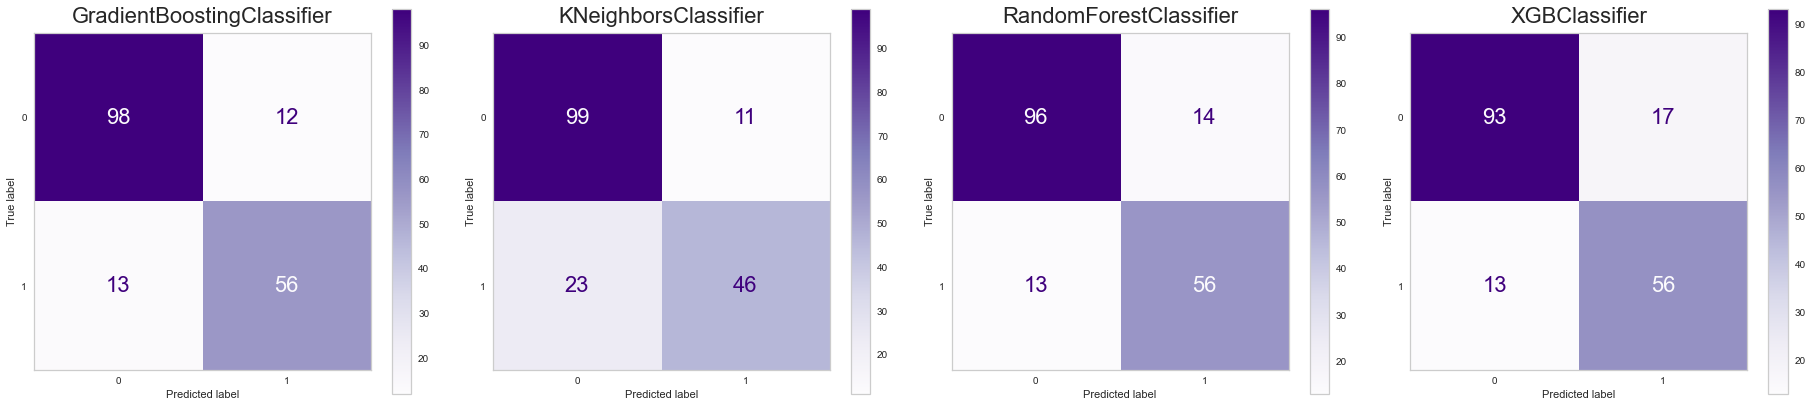

In [122]:
fig, axes = plt.subplots(1,4, figsize=(26,6))
plt.rcParams.update({'font.size': 22})

classifiers = [gbc_model, knn_grid_model, rf_tuned_model, xgb_tuned_model]
for cls, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cls, X_test, y_test, cmap=plt.cm.Purples, ax=ax)
    ax.grid(False)
    ax.set_title(type(cls.named_steps['clf']).__name__, size=22, pad=10)

plt.tight_layout()
plt.show()

In [120]:
compare = pd.DataFrame({
   'Model': ['Gradient Boosting', 'KNN',  'Random Forest', 'XGBoost'],
   'test_accuracy': [gbc_test_accuracy, knn_test_accuracy, rf_test_accuracy, xgb_test_accuracy],
   'train_accuracy': [gbc_train_accuracy, knn_train_accuracy, rf_train_accuracy, xgb_train_accuracy],
   'crossval_accuracy':[gbc_crosvalscore_accuracy,knn_crosvalscore_accuracy,rf_crosvalscore_accuracy,xgb_crosvalscore_accuracy],
   'test_recall': [gbc_test_recall, knn_test_recall, rf_test_recall, xgb_test_recall],
   'train_recall': [gbc_train_recall, knn_train_recall, rf_train_recall, xgb_train_recall],
   'crossval_recall':[gbc_crosvalscore_recall,knn_crosvalscore_recall,rf_crosvalscore_recall,xgb_crosvalscore_recall],
})

compare

,Model,test_accuracy,train_accuracy,crossval_accuracy,test_recall,train_recall,crossval_recall
0,Gradient Boosting,0.860,0.895,0.826,0.812,0.795,0.715
1,KNN,0.810,0.817,0.812,0.667,0.659,0.642
2,Random Forest,0.849,0.902,0.822,0.812,0.806,0.700
3,XGBoost,0.832,0.886,0.830,0.812,0.784,0.719


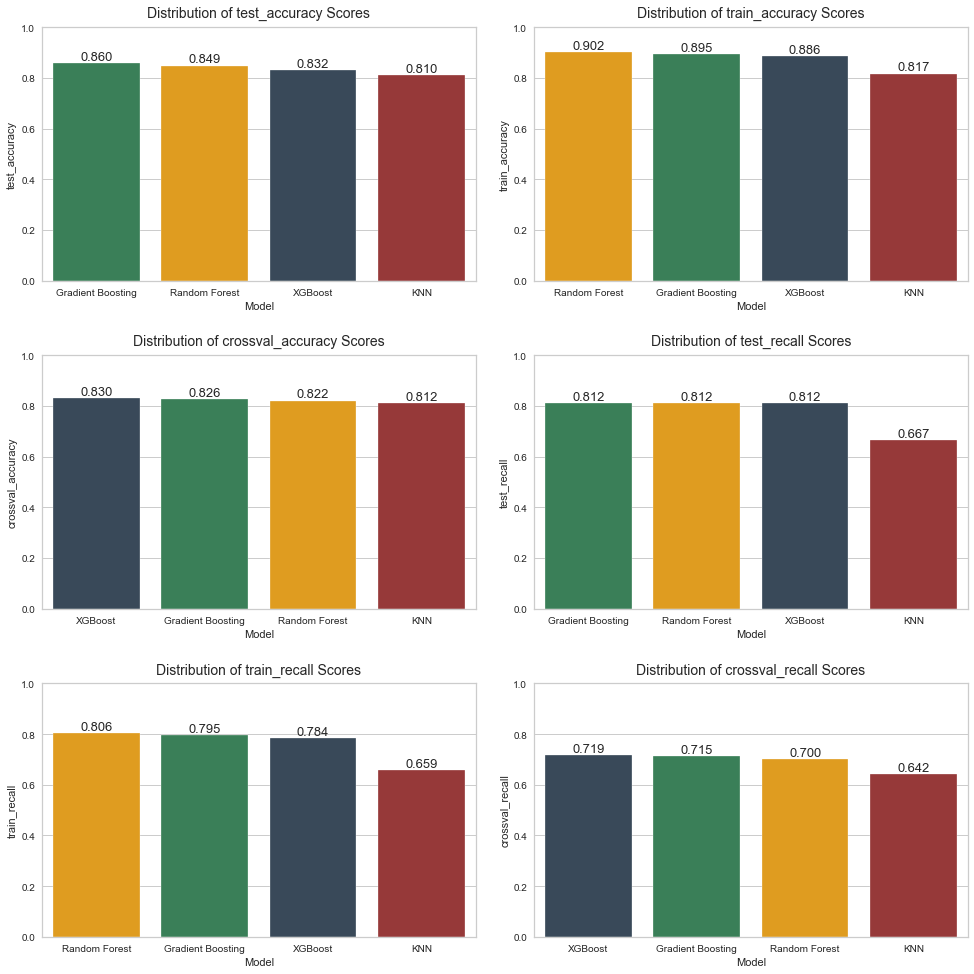

In [121]:
plt.figure(figsize=(14,14))

index = 0
colors={'Gradient Boosting': 'seagreen', 'Random Forest': 'orange', 'KNN': 'brown', 'XGBoost': '#34495E'}

for col in compare.iloc[:, 1:].columns:    
    index += 1
    plt.subplot(3,2,index)
    a = sns.barplot(data=compare.sort_values(col, ascending=False), x='Model', y=col, palette=colors)
    a.bar_label(a.containers[0], fmt='%.3f', fontsize=13), plt.ylim(0, 1)
    plt.title(f'Distribution of {col} Scores', fontsize=14, pad=10)
plt.tight_layout()

In [123]:
# FINAL MODEL

preprocessor = ColumnTransformer(transformers=[
    ('enc', OneHotEncoder(drop='if_binary'), ['Sex','Embarked','Ticket'])
], remainder='passthrough')

gbc_model = Pipeline(steps=[
      ('preprocessor', preprocessor),
      ('clf', GradientBoostingClassifier(random_state=42))
]).fit(X,y)

<div style="margin:auto;padding:10px;background-color:rosybrown;display:inline-block;border:5px;border-style:round;border-color:#0000ff;border-radius:25px;width:960px;height:60px">
    <h1 style="text-align:center;color:k;font-size:150%;">5. PREDICTION OF TEST DATA<a id='conc'></h1>
</div>

[CONTENT](#content)

In [124]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,male,35,0,0,own,7.829,Q
1,3,female,47,1,0,own,7.000,S
2,2,male,62,0,0,own,9.688,Q
3,3,male,27,0,0,own,8.662,S
4,3,female,22,1,1,collective,12.287,S


In [125]:
gbc_model.predict(test_data)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [126]:
test_ids = pd.read_csv('test.csv')['PassengerId']
test_ids.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [127]:
test_predictions = gbc_model.predict(test_data)
submission = pd.DataFrame({'PassengerId': test_ids.values, 'Survived': test_predictions})
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [128]:
submission.to_csv('submission.csv', index=False)